In [2]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

import helpers as h

warnings.filterwarnings('ignore')

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Data Source

This is information that is availabe on the OSPI website: [Washington State Report Card](http://reportcard.ospi.k12.wa.us/DataDownload.aspx). 

- 2018: http://reportcard.ospi.k12.wa.us/Reports/2018/2_03_AIM-WCAS-SBA%20Assessments%20School%20(with%20suppression%20-%20new%20format).txt
- 2017: http://reportcard.ospi.k12.wa.us/Reports/2017/2_03_AIM-EOC-MSP-SBA%20Assessments%20School%20(with%20suppression%20-%20new%20format).txt
- 2016: http://reportcard.ospi.k12.wa.us/Reports/2016/2_03_AIM-EOC-MSP-SBA%20Assessments%20School%20(with%20suppression%20-%20new%20format).txt



In [3]:
#df = pd.read_csv("http://reportcard.ospi.k12.wa.us/Reports/2018/2_03_AIM-WCAS-SBA%20Assessments%20School%20(with%20suppression%20-%20new%20format).txt", sep='\t')
df = h.load_dataset(2018)

### Data Cleanup

This section allows us to get a sense of what is available in the dataset. I'm still looking for a data dictionary that explains some of the abbreviations (What is `PP`?) and jargon (what is `Level2`?). 

But, most of this feels self explanatory.

In [4]:
df.columns

Index(['ESD', 'County', 'District', 'DistrictCode', 'School', 'SchoolCode',
       'schoolYear', 'testAdministration', 'Subject', 'GradeLevel',
       'StudentGroup', 'suppressed', 'suppressReason',
       'countTotalTested_and_NotTested', 'countMetStandardIncludingPP',
       'PercentMetStandardIncludingPP', 'countMetStandardWithoutPP',
       'PercentMetStandardWithoutPP', 'percentMeetingStandardExcludingNoScore',
       'countLevel4', 'PercentLevel4', 'countLevel3', 'PercentLevel3',
       'countLevel2', 'PercentLevel2', 'countLevel1', 'PercentLevel1',
       'countNoScore', 'percentNoScore', 'countNotMet', 'PercentNotMet',
       'countExcusedAbsence', 'countExempted'],
      dtype='object')

In [5]:
df.isnull().sum().sort_values(ascending=False)

countExcusedAbsence                       233294
countExempted                             193434
PercentLevel3                             143790
countMetStandardIncludingPP               143790
PercentMetStandardIncludingPP             143790
PercentMetStandardWithoutPP               143790
percentMeetingStandardExcludingNoScore    143790
countLevel4                               143790
PercentLevel4                             143790
countLevel3                               143790
countMetStandardWithoutPP                 143790
countLevel2                               143790
countLevel1                               143790
PercentLevel1                             143790
countNoScore                              143790
percentNoScore                            143790
countNotMet                               143790
PercentNotMet                             143790
PercentLevel2                             143790
suppressReason                             89504
ESD                 

In [6]:
# getting rid of information we don't want to keep around (either redudannt, empty, etc.)
remove_cols = [
    'DistrictCode','ESD','SchoolCode','countExcusedAbsence','schoolYear','countExempted',
    'countLevel1','countLevel2','countLevel3','countLevel4',
    'PercentLevel1','PercentLevel2','PercentLevel3','PercentLevel4'
]

df = df.drop(remove_cols,axis=1)

In [7]:
df.describe().round(2)

,countTotalTested_and_NotTested,countMetStandardIncludingPP,PercentMetStandardIncludingPP,countMetStandardWithoutPP,PercentMetStandardWithoutPP,percentMeetingStandardExcludingNoScore,countNoScore,percentNoScore,countNotMet,PercentNotMet
count,233294.00,89504.00,89504.00,89504.00,89504.00,89504.00,89504.00,89504.00,89504.00,89504.00
mean,31.49,34.05,49.96,34.05,49.95,51.33,2.19,2.81,29.42,49.96
std,53.49,42.74,21.93,42.74,21.93,22.02,11.66,7.63,34.45,21.93
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,5.00
25%,2.00,9.00,33.30,9.00,33.30,35.00,0.00,0.00,10.00,32.70
50%,10.00,20.00,50.00,20.00,50.00,52.20,0.00,0.00,18.00,50.00
75%,39.00,41.00,67.20,41.00,67.20,68.70,1.00,2.60,34.00,66.60
max,669.00,559.00,94.90,559.00,94.90,100.00,495.00,94.70,580.00,100.00


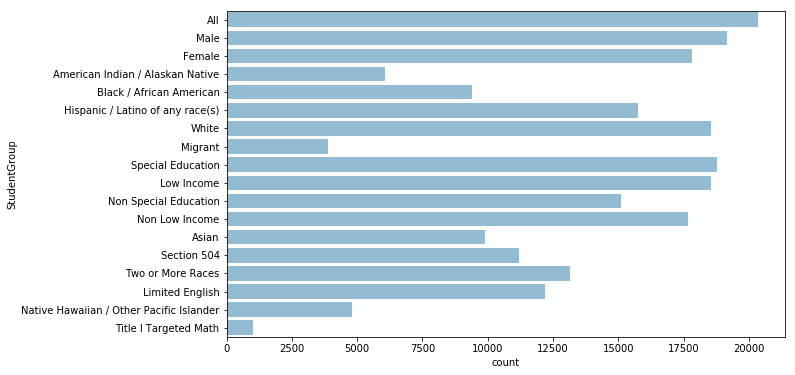

In [8]:
# What type of "StudentGroup" do we have?
base_color = sns.color_palette("Blues")[2]
plt.figure(figsize=[10,6])
sns.countplot(data=df, y='StudentGroup', color=base_color)
plt.show()

### Digging into 3rd Grade

We'll now take a look at just 3rd grade data. The hope / intent of slicing the data set into this cohort is that we can better compare different school performance if we target a single age group. 

In [9]:
# User helper function to filter out 3rd grade
df3 = h.filter_by_grade(df, 3)

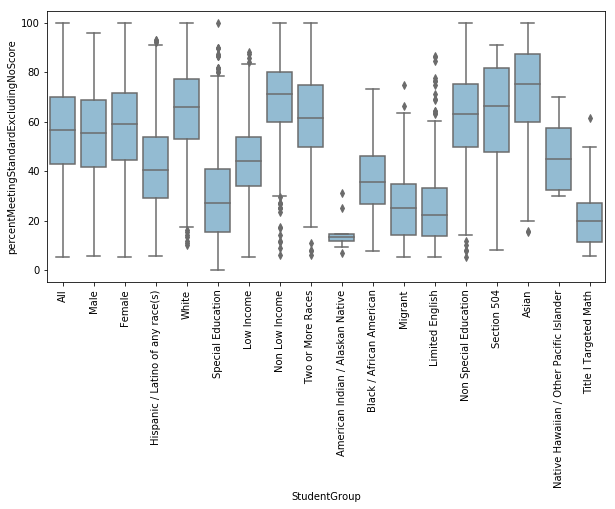

In [10]:
# First look at distribution of scores across different student group cohorts. 
#   Remember - this is all 3rd graders
plt.figure(figsize=[10,5])
sns.boxplot(data=df3, x='StudentGroup', y='percentMeetingStandardExcludingNoScore', color = base_color)
plt.xticks(rotation=90)
plt.show()

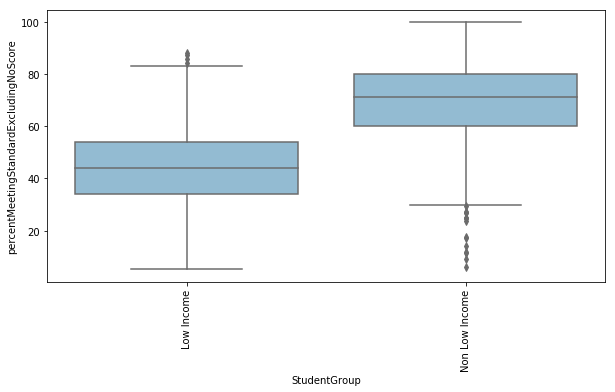

In [11]:
# Another way to look at this is to just look at two student groups
plt.figure(figsize=[10,5])
sns.boxplot(data=df3[(df3["StudentGroup"]=="Low Income") | (df3["StudentGroup"]=="Non Low Income")], 
                      x='StudentGroup', y='percentMeetingStandardExcludingNoScore', color = base_color)
plt.xticks(rotation=90)
plt.show()

The above chart shows the gap between performance from low income and non-low income students. It is one of the larger predictors of test success. Also- make a note at the several outliers of low scores in the non-low income bracket. We'll discuss those in a bit.

Every group will have some difference, but it's more pronounced in a few places -- race and income. One area that has a less pronounced gap is gender. 

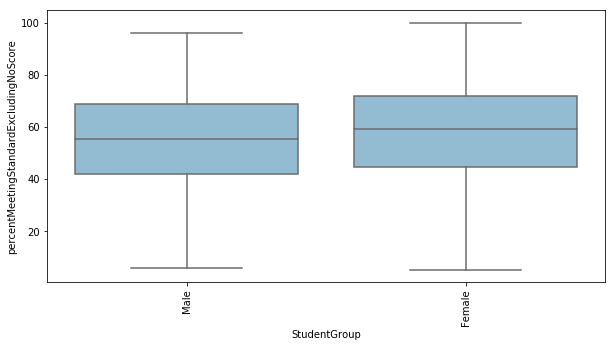

In [12]:
# Analyze gender
plt.figure(figsize=[10,5])
sns.boxplot(data=df3[(df3["StudentGroup"]=="Male") | (df3["StudentGroup"]=="Female")], 
                      x='StudentGroup', y='percentMeetingStandardExcludingNoScore', color = base_color)
plt.xticks(rotation=90)
plt.show()

### Income as a factor in test performance

Let's dig into each school's reported scores. This is a difficult chart to read -- so let me explain it.

1. Each dot represents a school
2. The dashed black line (45 degree angle) is where scores should congregate if these student groups performed exactly the same
3. Any dot below the dashed black line shows performance gap where low income students underperform higher income (and vice versa)

Since most dots are below the dashed line, most schools have some sort of performance gap where income is the factor.

The following chart shows scores in english tests.

<Figure size 720x720 with 0 Axes>

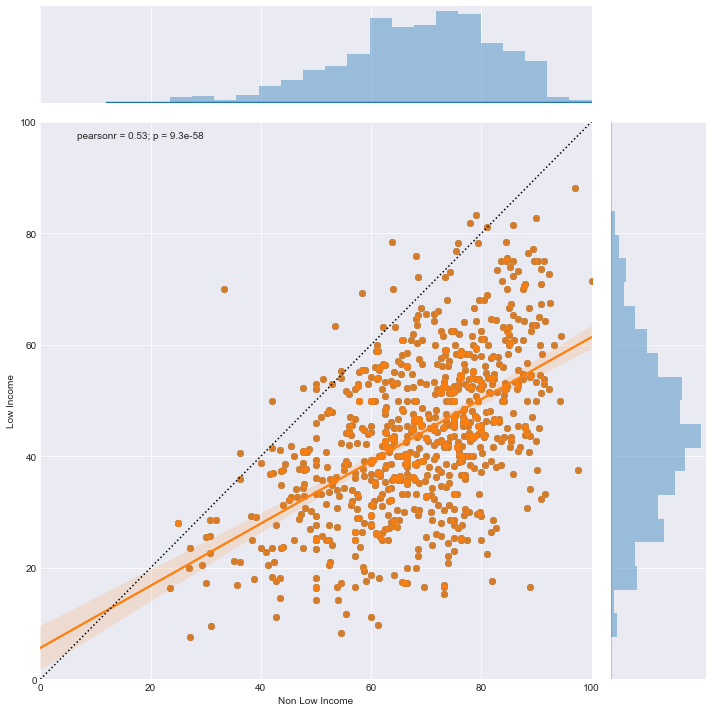

In [13]:
df_ = h.compare_groups(df, 3, 'english', ['Low Income','Non Low Income'], ['percentMeetingStandardExcludingNoScore'])

From this chart, we can see that there are 6 schools that were able to get to an 80% pass rate for both low income and non-low income student groups. These were:

In [14]:
df2018_ela = df3.loc[(df3["StudentGroup"]=="Low Income") & 
                (df3["Subject"]=="ELA") & 
                (df3["percentMeetingStandardExcludingNoScore"] > 80)]

df2018_ela.loc[:,['District', 'School']]

,District,School
26659,Olympia School District,Centennial Elementary Olympia
39564,Kennewick School District,Cottonwood Elementary
55339,Central Kitsap School District,Emerald Heights Elementary
167075,Mead School District,Prairie View Elementary
187590,Tacoma School District,Sherman
227308,West Valley School District (Yakima),Wide Hollow Elementary


Note also in the above chart, that as scores of non-low income student groups grows, so does the gap. We can see this if we plot the ratio of low income to non-low income, as we do below. (1 == equality, while anything below 1 shows a gap)

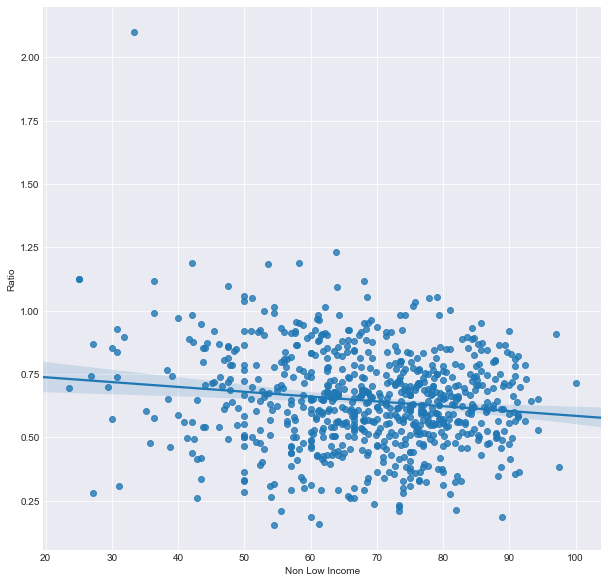

In [15]:
# calculate ratios
df_["Ratio"] = df_["Low Income"] / df_["Non Low Income"]

plt.figure(figsize=(10,10))
sns.set_style('darkgrid')

ax = sns.regplot(x="Non Low Income", y="Ratio", data=df_)

And, this is the same groups, but plotted as math scores shows 11 schools in the low-income group that has 80% pass rate on the math test.

<Figure size 720x720 with 0 Axes>

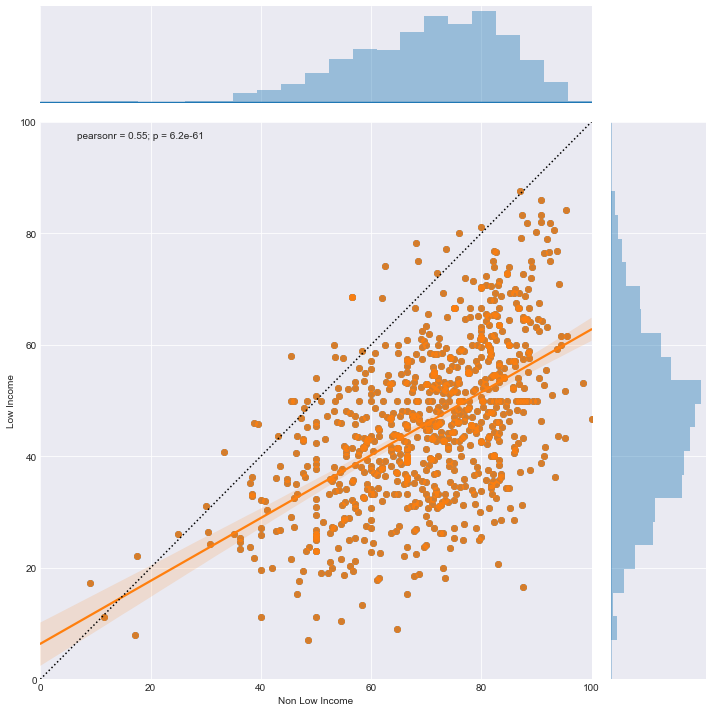

In [16]:
df_ = h.compare_groups(df, 3, 'math', ['Low Income','Non Low Income'], ['percentMeetingStandardExcludingNoScore'])

In [17]:
df2018_math = df3.loc[(df3["StudentGroup"]=="Low Income") & 
                      (df3["Subject"]=="MATH") & 
                      (df3["percentMeetingStandardExcludingNoScore"] > 80)]

df2018_math.loc[:, ['District', 'School']]

,District,School
14986,Shoreline School District,Briarcrest Elementary
69161,Puyallup School District,Fruitland Elementary
76311,Camas School District,Grass Valley Elementary
86622,Zillah School District,Hilton Elementary School
111489,Colfax School District,Leonard M Jennings Elementary
123542,Edmonds School District,Maplewood Parent Coop
139468,White River School District,Mountain Meadow Elementary
140622,East Valley School District (Yakima),Moxee Elementary
193955,Ridgefield School District,South Ridge Elementary
199927,Seattle Public Schools,Stevens Elementary School


### Is the pattern consistent?

Looking at these schools, are they preforming well in all grades and all years?

In [18]:
# Load 3 years of data here
df2018 = h.load_dataset(2018)
df2017 = h.load_dataset(2017)
df2016 = h.load_dataset(2016)

In [65]:
# ok, folks - watch out hacker shortcut function that is not that re-usable outside of this workbook. 
# just using this to merge annual datasets into a single view
def data_mixologist(grade, subject, group, value):
    # get the groups we care about
    df2018_ = h.filter_by_grade_subject_student_group(df2018, grade, subject, group, value)
    df2017_ = h.filter_by_grade_subject_student_group(df2017, grade, subject, group, value)
    df2016_ = h.filter_by_grade_subject_student_group(df2016, grade, subject, group, value)
    
    # Merge the datasets
    result_ = pd.DataFrame()
    result_ = pd.merge(df2018_, df2017_, how='outer', on=['District', 'School'])
    result_ = pd.merge(result_, df2016_, how='outer', on=['District', 'School'])
    result_.columns = ['District','School','2018','2017','2016']
    return result_

In [66]:
result = data_mixologist(3,'math','Low Income','percentMeetingStandardExcludingNoScore')
result.dropna().shape


(662, 5)

In [67]:
result.dropna().loc[(result['2016']>65) & (result['2017']>65) & (result['2018']>65)].shape

(12, 5)

Consistency is an issue - of the 662 schools that report data for low-income groups in the past 3 years, only 12 were able to score over 65% consistently. That's 1.8% of the schools. Let's now contrast with non-low income.


In [68]:
resultn = data_mixologist(3,'math','Non Low Income','percentMeetingStandardExcludingNoScore')
resultn.dropna().shape

(670, 5)

In [69]:
resultn.dropna().loc[(resultn['2016']>65) & (resultn['2017']>65) & (resultn['2018']>65)].shape

(303, 5)

Consistency is less an issue when non-low income. Of the 670 schools reporting all 3 years, a full 303 were able to score over 65% consistently. That's 47.3% -- or 26x the rate of low income groups! And this pattern is visiable in english learning as well.

In [70]:
result = data_mixologist(3,'english','Low Income','percentMeetingStandardExcludingNoScore')
result.dropna().shape

(671, 5)

In [72]:
result.dropna().loc[(result['2016']>65) & (result['2017']>65) & (result['2018']>65)].shape

(5, 5)

In [73]:
resultn = data_mixologist(3,'english','Non Low Income','percentMeetingStandardExcludingNoScore')
resultn.dropna().shape

(678, 5)

In [74]:
resultn.dropna().loc[(resultn['2016']>65) & (resultn['2017']>65) & (resultn['2018']>65)].shape

(242, 5)

Low income groups were able to consistently score about 65 in 5 schools out of 671 (0.75%) versus 242 out of 678 in non-low income (35.7%)